In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import ode
from numpy.lib import scimath
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
#import function to do single simulation
from MeanField.MeanFieldSimulation import single_simulation

In [226]:
N=5000
tf = .05
dt = .1e-4

pulses = [[.01,1e-5,'MW',200000],[.03,1e-5,'MW',200000]]
#pulses = []
pulses1 = []

In [227]:
from FockStateSimulation import main
simulation_params = {
    'total_time': .05, #simulated time (s),
    'mag_time':0.015,
    'dt':0.002e-3, #simulation time step,
    'tauB' : 1e-3,
    'c':36*2*np.pi,
    'n_atoms':5000,
    'plot':False
    }


In [166]:
data = main(**simulation_params)

[##################################################]100%
 simulation complete


In [228]:
data1 = single_simulation(N,200,tf,dt,pulses,plot = False)
data3 = single_simulation(N,200,tf,dt,pulses1,plot = False)

[##################################################]100% Evolve
Calculation Finished in time: 39.20
[##################################################]100% Evolve
Calculation Finished in time: 24.97


In [211]:
% run CoherentStateChebyshev/spinorf.py
data2 = np.loadtxt('results.txt',skiprows = 18)

[                                                  ] 0%

/home/zachglassman/Downloads/MySpinorSim/CoherentStateChebyshev/spinorf.py:113: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  e_min,e_max,d,e,first_n0 = setup_scaled_H(eqz + emw[0],c[0],atom_n,m,n_max)
/home/zachglassman/Downloads/MySpinorSim/CoherentStateChebyshev/spinorf.py:115: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  state = np.zeros(n_max, dtype = complex)
/home/zachglassman/Downloads/MySpinorSim/CoherentStateChebyshev/spinorf.py:153: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  e_min,e_max,d,e, first_n0 =setup_scaled_H(q,c[interval], atom_n, m,n_max)


[##################################################]100%
Calculation Complete
Norm recovered 0.0191252147144
Time for Calculation: 40.113863945007324
File written to: results.txt


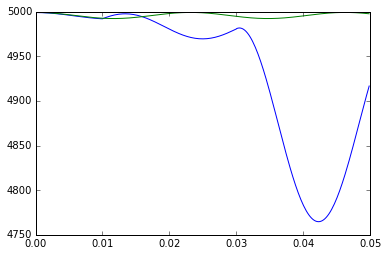

In [229]:
plt.plot(data1[0,:],data1[1,:]*N,label = "mean field")
plt.plot(data3[0,:],data3[1,:]*N,label = "mean field no pulse")

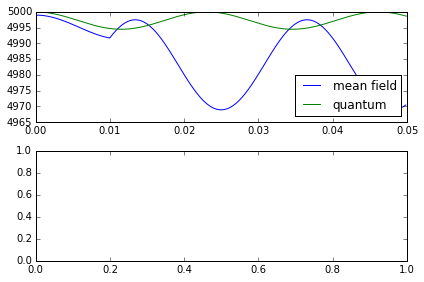

In [220]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data1[0,:],data1[1,:]*N,label = "mean field")
ax[0].plot(data[0,:],data[1,:],label = 'quantum')
#ax[1].plot(data1[0],100*np.abs(data[1][::2]-data1[1]*N)/(data1[1]*N))
#ax[0].plot(data2[:,0],data2[:,1],label = 'Coherent')
plt.tight_layout()
ax[0].legend(loc=4)

In [213]:
print(data1[1][0]*N,data[1][0],data2[:,1][0])

4998.99473829 5000.0 4998.602
